In [1]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [2]:
#### 3rd April, 2024

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### df1 is ohio cohort and df2 is HPV capture seq data
path1='table1.xlsx'
colnames1=['sample ID', 'virus type', 'virus start','virus stop', 'Chr.','chr. start', 'chr. stop', 'strand1', 'strand2', '#supporting pairs', '#split read support', 'representative break', 'nearby genes (up to four genes found within +/-500 kb from breakpoints are shown)']
df1=pd.read_excel(path1, names=colnames1)

path2='table2.xlsx'
colnames2=colnames1=['sample ID', 'virus type', 'virus start','virus stop', 'Chr.','chr. start', 'chr. stop', 'strand1', 'strand2', '#supporting pairs', '#split read support', 'representative break', 'nearby genes (up to four genes found within +/-500 kb from breakpoints are shown)']
df2=pd.read_excel(path2, names=colnames1)

#### concatenating vertically

df = pd.concat([df1, df2])
file_name='HPVint.xlsx'
df.to_excel(file_name)





/tmp/ipykernel_1078/1668434877.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
# Unique Sample ID
#Value count of each unique sample ID
# Count the unique sample IDs
unique_sample_ids = df['sample ID'].nunique()

# Count occurrences of each sample ID
sample_id_counts = df['sample ID'].value_counts()

print("Number of unique sample IDs:", unique_sample_ids)
print("Counts of each sample ID:")
print(sample_id_counts)

Number of unique sample IDs: 108
Counts of each sample ID:
sample ID
GS18026         99
GS18047         64
GS18076         61
GS21049         54
TCGA-CR-7404    48
                ..
GS18102          1
GS21029          1
GS18039          1
GS21018          1
GS18037          1
Name: count, Length: 108, dtype: int64


In [5]:
# Count the unique HPV TYpe
unique_virustype = df['virus type'].nunique()

# Count occurrences of each sample ID
virustype_counts = df['virus type'].value_counts()

print("Number of unique virus types:", unique_virustype)
print("Counts of each HPV type:")
print(virustype_counts)

Number of unique virus types: 5
Counts of each HPV type:
virus type
HPV16    929
HPV35     22
HPV33     16
HPV18      7
HPV69      4
Name: count, dtype: int64


In [6]:
# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(virustype_counts, labels=virustype_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Proportion of Each Virus Type')
plt.savefig('/home/guest/Animikha/Fig35.png')
plt.show()

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

plt.figure(figsize=(15,10))
ax=sample_id_counts.plot(kind='bar', width= 1.0)

plt.xlabel('Sample IDs')
plt.ylabel('Counts of HPV Integration in Each Sample')
plt.title('Counts of HPV Integration in Each Sample')
plt.xticks(rotation=90)
plt.tight_layout
plt.savefig('/home/guest/Animikha/Fig30.png',bbox_inches='tight')
plt.show()

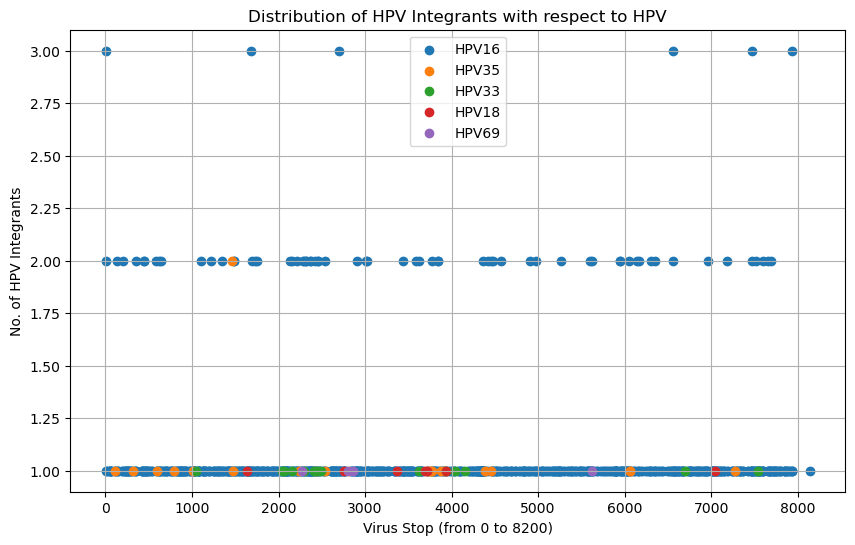

In [8]:
import matplotlib.pyplot as plt

# Assuming file_df is your data frame containing 'virus start', 'virus stop', and 'series1' columns

# Grouping data by 'virus stop' and counting the number of integrants for each value
integrants_count = df.groupby('virus stop').size()

# Extracting 'virus stop' values and HPV types
virus_stop_values = integrants_count.index
hpv_types = df.groupby('virus stop')['virus type'].first()

# Create the plot
plt.figure(figsize=(10, 6))

# Plotting each point with a different color based on the HPV type
for hpv_type in hpv_types.unique():
    indices = hpv_types == hpv_type
    plt.scatter(virus_stop_values[indices], integrants_count[indices], label=hpv_type)

# Adding labels and title
plt.xlabel('Virus Stop (from 0 to 8200)')
plt.ylabel('No. of HPV Integrants')
plt.title('Distribution of HPV Integrants with respect to HPV')

# Adding legend
plt.legend()

# Show plot
plt.grid(True)



plt.savefig('/home/guest/Animikha/Fig35.png')
plt.show()

In [13]:
### Representative break counts.....

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

representative_break=df.groupby('sample ID')['representative break'].value_counts()



###### filtering only 'Y' representative breaks 
# Filter dataframe to get only rows where 'representative break' is 'Y'
y_data = representative_break[representative_break.index.get_level_values(1) == 'Y']

y_data


plt.figure(figsize=(20,5))
y_data.plot(kind='bar', width=0.5)

plt.xlabel('sample IDs')
plt.ylabel('No. of representative breaks')
plt.title('No. of representative breaks in each sample')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.savefig('/home/guest/Animikha/Fig32A.png')

plt.show() 

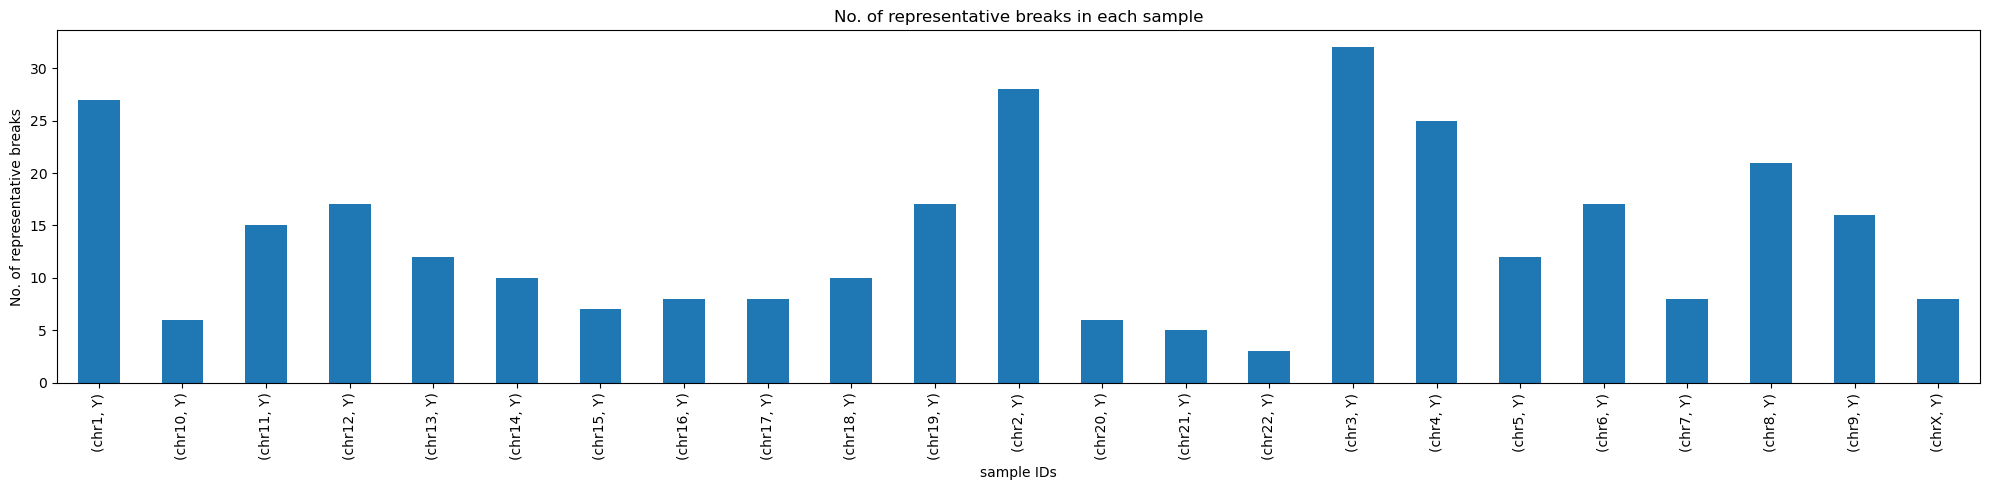

In [12]:
### Representative break counts.....

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

representative_break=df.groupby('Chr.')['representative break'].value_counts()



###### filtering only 'Y' representative breaks 
# Filter dataframe to get only rows where 'representative break' is 'Y'
y_data = representative_break[representative_break.index.get_level_values(1) == 'Y']

y_data


plt.figure(figsize=(20,5))
y_data.plot(kind='bar', width=0.5)

plt.xlabel('sample IDs')
plt.ylabel('No. of representative breaks')
plt.title('No. of representative breaks in each sample')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.savefig('/home/guest/Animikha/Fig32B.png')

plt.show() 

In [10]:
df

sample ID virus type  virus start  virus stop   Chr.  chr. start  \
0     GS18001      HPV16         6031        6032  chr17     1104459   
1     GS18001      HPV16         5736        5737   chr2     9961582   
2     GS18001      HPV16         6266        6267   chr2     9967088   
3     GS18001      HPV16         6940        6941  chr21    11122389   
4     GS18001      HPV16         4523        4524   chr5    29687618   
..        ...        ...          ...         ...    ...         ...   
217   GS21052      HPV16         2211        2212   chr3     2140200   
218   GS21052      HPV16         4483        4486   chr3     2143079   
219   GS21052      HPV16         7050        7053   chr3     2148095   
220   GS21052      HPV16         2457        2458   chr3     2148106   
221   GS21052      HPV16         1027        1047   chr8   129783851   

     chr. stop strand1 strand2  #supporting pairs  #split read support  \
0      1104460       -       +                  2                    0   
1      9961583       +       +                  7                    9   
2      9967089       -       -                  7                    2   
3     11122390       +       +                  4                    0   
4     29687619       -       +                 24                    9   
..         ...     ...     ...                ...                  ...   
217    2140201       -       -                111                  224   
218    2143081       -       -                  4                   33   
219    2148098       +       -                  4                   29   
220    2148107       -       +                 14                   44   
221  129783871       +       +                 12                   22   

    representative break  \
0                      Y   
1                      Y   
2                      N   
3                      Y   
4                      N   
..                   ...   
217                    Y   
218                    N   
219                    N   
220                    N   
221                    Y   

    nearby genes (up to four genes found within +/-500 kb from breakpoints are shown)  
0                               ABR,BHLHA9,TUSC5,YWHAE                                 
1                       TAF1B,GRHL1,YWHAQ,LOC101929882                                 
2                       TAF1B,GRHL1,YWHAQ,LOC101929882                                 
3                               BAGE,BAGE2,BAGE4,BAGE3                                 
4                               LOC105374704,LINC02064                                 
..                                                 ...                                 
217                                    CNTN4,CNTN4-AS2                                 
218                                    CNTN4,CNTN4-AS2                                 
219                                    CNTN4,CNTN4-AS2                                 
220                                    CNTN4,CNTN4-AS2                                 
221                      LINC00976,LINC00824,LINC00977                                 

[978 rows x 13 columns]

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


##### sorting by Chr., chr.stop

sorted_df = df.sort_values(by=['Chr.', 'chr. stop'], ascending=True)
sorted_df['distance']=sorted_df.groupby('Chr.')['chr. stop'].diff().fillna(0)

#### filtering the data frame distance should not be zero, distance zero means same position

filtered_df=sorted_df[sorted_df['distance'] != 0]
filtered_df

unique_chromosomes = filtered_df['Chr.'].unique()

# Setting up the plot
plt.figure(figsize=(12, 8))

# Loop through each unique chromosome and plot
for chr in unique_chromosomes:
    subset = filtered_df[filtered_df['Chr.'] == chr]
    sns.histplot(data=subset, x='distance', element='bars', fill=True, common_norm=False, alpha=0.5, label=chr)

plt.title('Overlayed Distance Distribution across Chromosomes')
plt.xlabel('Distance between consecutive chromosome stop positions (in base pairs)')
plt.ylabel('Frequency')
plt.legend(title='Chromosome')
plt.tight_layout()
plt.savefig('/home/guest/Animikha/Fig33.png')
plt.show()

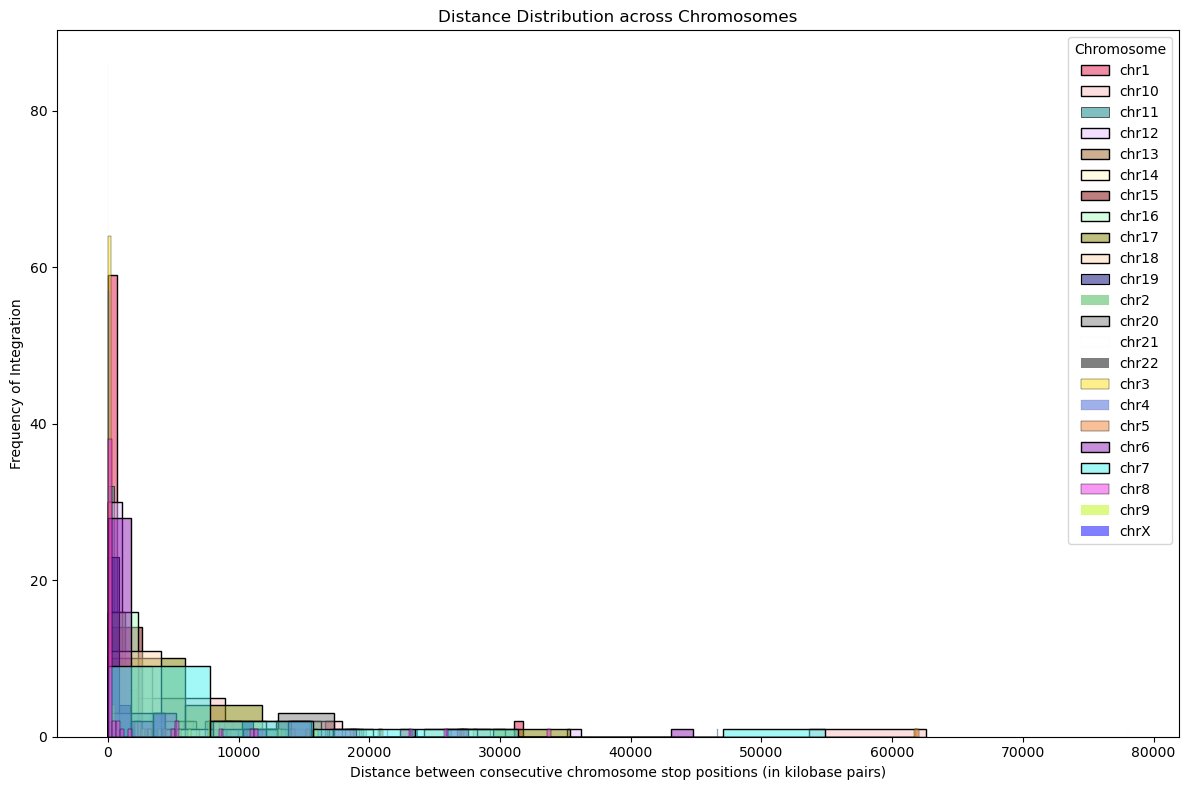

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming file_df is your DataFrame and it's already loaded

# Sort the DataFrame by 'Chr.' and 'chr. stop'
sorted_df = df.sort_values(by=['Chr.', 'chr. stop'])

# Calculate the distance between consecutive 'Chr. stop' positions for each chromosome
sorted_df['distance'] = sorted_df.groupby(['Chr.'])['chr. stop'].diff().fillna(0)
sorted_df['distance'] = sorted_df.groupby(['Chr.'])['chr. stop'].diff().fillna(0) / 1000  # Convert to kilobase pairs

# Filter out the first row of each group since its distance is not meaningful (or set to 0)
filtered_df = sorted_df[sorted_df['distance'] != 0]
chromosome_colors = {
    'chr1': '#e6194b', 'chr2': '#3cb44b', 'chr3': '#ffe119', 'chr4': '#4363d8', 'chr5': '#f58231',
    'chr6': '#911eb4', 'chr7': '#46f0f0', 'chr8': '#f032e6', 'chr9': '#bcf60c', 'chr10': '#fabebe',
    'chr11': '#008080', 'chr12': '#e6beff', 'chr13': '#9a6324', 'chr14': '#fffac8', 'chr15': '#800000',
    'chr16': '#aaffc3', 'chr17': '#808000', 'chr18': '#ffd8b1', 'chr19': '#000075', 'chr20': '#808080',
    'chr21': '#FFFFFF', 'chr22': '#000000', 'chrX': '#0000FF'
}


# Setting up the plot
plt.figure(figsize=(12, 8))

# Loop through each unique chromosome and plot using the defined colors
unique_chromosomes = filtered_df['Chr.'].unique()
for chr in unique_chromosomes:
    subset = filtered_df[filtered_df['Chr.'] == chr]
    sns.histplot(
        data=subset,
        x='distance',
        element='bars',
        multiple='stack',
        fill=True,
        common_norm=False,
        alpha=0.5,
        label=chr,
        color=chromosome_colors[chr]  # Apply the color from the custom palette
    )

plt.title('Distance Distribution across Chromosomes')
plt.xlabel('Distance between consecutive chromosome stop positions (in kilobase pairs)')
plt.ylabel('Frequency of Integration')
plt.legend(title='Chromosome')
plt.tight_layout()
plt.savefig('Fig33.png')  
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#  file_df is my DataFrame

# Sort the DataFrame by 'sample ID', 'Chr.', and 'chr. stop'
sorted_df = df.sort_values(by=['sample ID', 'Chr.', 'chr. stop'])

# Calculate the distance between consecutive 'virus stop' positions for each sample and chromosome
sorted_df['distance'] = sorted_df.groupby(['sample ID', 'Chr.'])['chr. stop'].diff().fillna(0)
sorted_df['distance'] = sorted_df.groupby(['Chr.'])['chr. stop'].diff().fillna(0) / 1000  # Convert to kilobase pairs

# Filter out the first row of each group since its distance is not meaningful (or set to 0)
filtered_df = sorted_df[sorted_df['distance'] != 0]

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


unique_samples = sorted_df['sample ID'].unique()

# Setting up the plot
plt.figure(figsize=(12, 6 * len(unique_samples)))

for i, sample in enumerate(unique_samples):
    plt.subplot(len(unique_samples), 1, i + 1)
    sns.histplot(data=sorted_df[sorted_df['sample ID'] == sample], x='distance', hue='Chr.', multiple='stack')
    plt.title(f'sample {sample}: Distance Distribution')
    plt.xlabel('Distance between consecutive chr. stop positions (in kilobase pairs)')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('/home/guest/Animikha/Fig34.png')
plt.show()

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from mpl_toolkits.mplot3d import Axes3D

# Assuming file_df is your DataFrame and it's already loaded

# Sort the DataFrame by 'Chr.' and 'chr. stop'
sorted_df = df.sort_values(by=['Chr.', 'chr. stop'])

# Calculate the distance between consecutive 'Chr. stop' positions for each chromosome
sorted_df['distance'] = sorted_df.groupby(['Chr.'])['chr. stop'].diff().fillna(0)
sorted_df['distance'] = sorted_df.groupby(['Chr.'])['chr. stop'].diff().fillna(0) / 1000  # Convert to kilobase pairs

# Filter out the first row of each group since its distance is not meaningful (or set to 0)
filtered_df = sorted_df[sorted_df['distance'] != 0]

# Increase figure size for better clarity
fig = plt.figure(figsize=(14, 10))  # Adjusted size
ax = fig.add_subplot(111, projection='3d')

# Color mapping
chromosome_colors = {
    'chr1': '#e6194b', 'chr2': '#3cb44b', 'chr3': '#ffe119', 'chr4': '#4363d8', 'chr5': '#f58231',
    'chr6': '#911eb4', 'chr7': '#46f0f0', 'chr8': '#f032e6', 'chr9': '#bcf60c', 'chr10': '#fabebe',
    'chr11': '#008080', 'chr12': '#e6beff', 'chr13': '#9a6324', 'chr14': '#fffac8', 'chr15': '#800000',
    'chr16': '#aaffc3', 'chr17': '#808000', 'chr18': '#ffd8b1', 'chr19': '#000075', 'chr20': '#808080',
    'chr21': '#FFFFFF', 'chr22': '#000000', 'chrX': '#0000FF'
}

# Legend patches
legend_patches = [Patch(color=color, label=chr) for chr, color in chromosome_colors.items()]

# Loop through each unique chromosome and plot
unique_chromosomes = filtered_df['Chr.'].unique()
chromosome_indices = {chr: index for index, chr in enumerate(unique_chromosomes)}
for chr in unique_chromosomes:
    subset = filtered_df[filtered_df['Chr.'] == chr]
    hist, bins = np.histogram(subset['distance'], bins=20)
    xs = (bins[:-1] + bins[1:]) / 2
    ax.bar(xs, hist, zs=chromosome_indices[chr], zdir='y', alpha=0.8, width=np.diff(bins), color=chromosome_colors[chr])

ax.set_xlabel('Distance')
ax.set_ylabel('Chromosome')
ax.set_zlabel('Frequency')
ax.dist = 20
ax.set_box_aspect(None, zoom=1.00)
# Adjust y-axis ticks and labels
ax.set_yticks(range(len(unique_chromosomes)))
ax.set_yticklabels(unique_chromosomes, ha='right')

# Add legend
plt.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('3D Histogram of Distance Distribution across Chromosomes')


plt.savefig('3D_Fig11_chromosomes_overlayednew_with_legend_adjusted-merged.png')  # Adjust the path as necessary
plt.show()